In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## unit for each parameter is commented after it is declared (inline)
## if the suggested value for the parameter is different -
## The original default value from the original ADM1 report by Batstone et al (2002), is commented after each unit (inline)

##constant definition from the Rosen et al (2006) BSM2 report
R =  0.083145 #bar.M^-1.K^-1
T_base =  298.15 #K
p_atm =  1.013 #bar
T_op =  42.5+273.15  #k ##T_ad #=35 C

name = 'thoni'
influent_state = pd.read_csv(name + "_digester_influent_dyn"+ ".csv")
initial_state = pd.read_csv(name + "_digester_initial_SS"+  ".csv")

##parameter definition from the Rosen et al (2006) BSM2 report bmadm1_report
# Stoichiometric parameter
f_sI_xc =  0.2 # 0.1
f_xI_xc =  0.4 # 0.2
f_ch_xc =  0.4 # 0.2
f_pr_xc =  0.0 # 0.2
f_li_xc =  0.0 # 0.3
N_xc =  0.0376 / 14
N_I =  0.06 / 14 #kmole N.kg^-1COD
N_aa =  0.007 #kmole N.kg^-1COD
C_xc =  0.02786 #kmole C.kg^-1COD
C_sI =  0.03 #kmole C.kg^-1COD
C_ch =  0.0313 #kmole C.kg^-1COD
C_pr =  0.03 #kmole C.kg^-1COD
C_li =  0.022 #kmole C.kg^-1COD
C_xI =  0.03 #kmole C.kg^-1COD
C_su =  0.0313 #kmole C.kg^-1COD
C_aa =  0.03 #kmole C.kg^-1COD
f_fa_li =  0.95
C_fa =  0.0217 #kmole C.kg^-1COD
f_h2_su =  0.19
f_bu_su =  0.13
f_pro_su =  0.27
f_ac_su =  0.41
N_bac =  0.08 / 14 #kmole N.kg^-1COD
C_bu =  0.025 #kmole C.kg^-1COD
C_pro =  0.0268 #kmole C.kg^-1COD
C_ac =  0.0313 #kmole C.kg^-1COD
C_bac =  0.0313 #kmole C.kg^-1COD
Y_su =  0.1
f_h2_aa =  0.06
f_va_aa =  0.23
f_bu_aa =  0.26
f_pro_aa =  0.05
f_ac_aa =  0.40
C_va =  0.024 #kmole C.kg^-1COD
Y_aa =  0.08
Y_fa =  0.06
Y_c4 =  0.06
Y_pro =  0.04
C_ch4 =  0.0156 #kmole C.kg^-1COD
Y_ac =  0.05
Y_h2 =  0.06


# Biochemical parameter values from the Rosen et al (2006) BSM2 report
k_dis =  0.5 #d^-1
k_hyd_ch = 1.25 # 10 #d^-1
k_hyd_pr = 0.5  # 10 #d^-1
k_hyd_li = 0.4  # 10 #d^-1
K_S_IN =  10 ** -4 #M
k_m_su =  30 #d^-1
K_S_su =  0.5 #kgCOD.m^-3
pH_UL_aa =  5.5
pH_LL_aa =  4
k_m_aa =  50 #d^-1
K_S_aa =  0.3 ##kgCOD.m^-3
k_m_fa =  6 #d^-1
K_S_fa =  0.4 #kgCOD.m^-3
K_I_h2_fa =  5 * 10 ** -6 #kgCOD.m^-3
k_m_c4 =  20 #d^-1
K_S_c4 =  0.2 #kgCOD.m^-3
K_I_h2_c4 =  10 ** -5 #kgCOD.m^-3
k_m_pro =  13 #d^-1
K_S_pro =  0.1 #kgCOD.m^-3
K_I_h2_pro =  3.5 * 10 ** -6 #kgCOD.m^-3
k_m_ac =  8 #kgCOD.m^-3
K_S_ac =  0.15 #kgCOD.m^-3
K_I_nh3 =  0.0018 #M
pH_UL_ac =  7
pH_LL_ac =  6
k_m_h2 =  35 #d^-1
K_S_h2 =  7 * 10 ** -6 #kgCOD.m^-3
pH_UL_h2 =  6
pH_LL_h2 =  5
k_dec_X_su =  0.02 #d^-1
k_dec_X_aa =  0.02 #d^-1
k_dec_X_fa =  0.02 #d^-1
k_dec_X_c4 =  0.02 #d^-1
k_dec_X_pro =  0.02 #d^-1
k_dec_X_ac =  0.02 #d^-1
k_dec_X_h2 =  0.02 #d^-1
## M is kmole m^-3

# Physico-chemical parameter values from the Rosen et al (2006) BSM2 report
T_ad =  308.15 #K


K_w =  10 ** -14.0 * np.exp((55900 / (100 * R)) * (1 / T_base - 1 / T_ad)) #M #2.08 * 10 ^ -14

K_a_va =  10 ** -4.86 #M  ADM1 value = 1.38 * 10 ^ -5
K_a_bu =  10 ** -4.82 #M #1.5 * 10 ^ -5
K_a_pro =  10 ** -4.88 #M #1.32 * 10 ^ -5
K_a_ac =  10 ** -4.76 #M #1.74 * 10 ^ -5


K_a_co2 =  10 ** -6.35 * np.exp((7646 / (100 * R)) * (1 / T_base - 1 / T_ad)) #M #4.94 * 10 ^ -7
K_a_IN =  10 ** -9.25 * np.exp((51965 / (100 * R)) * (1 / T_base - 1 / T_ad)) #M #1.11 * 10 ^ -9


k_A_B_va =  10 ** 10 #M^-1 * d^-1
k_A_B_bu =  10 ** 10 #M^-1 * d^-1
k_A_B_pro =  10 ** 10 #M^-1 * d^-1
k_A_B_ac =  10 ** 10 #M^-1 * d^-1
k_A_B_co2 =  10 ** 10 #M^-1 * d^-1
k_A_B_IN =  10 ** 10 #M^-1 * d^-1


p_gas_h2o =  0.0313 * np.exp(5290 * (1 / T_base - 1 / T_ad)) #bar #0.0557
k_p = 5 * 10 ** 4 #m^3.d^-1.bar^-1 #only for BSM2 AD conditions, recalibrate for other AD cases #gas outlet friction ==============================================================================================================================================
k_L_a =  200.0 #d^-1
K_H_co2 =  0.035 * np.exp((-19410 / (100 * R))* (1 / T_base - 1 / T_ad)) #Mliq.bar^-1 #0.0271
K_H_ch4 =  0.0014 * np.exp((-14240 / (100 * R)) * (1 / T_base - 1 / T_ad)) #Mliq.bar^-1 #0.00116
K_H_h2 =  7.8 * 10 ** -4 * np.exp(-4180 / (100 * R) * (1 / T_base - 1 / T_ad)) #Mliq.bar^-1 #7.38*10^-4

# Physical parameter values used in BSM2 from the Rosen et al (2006) BSM2 report
V_liq =  4050 #3400 #m^3
V_gas =  350 #300 #m^3
V_ad = V_liq + V_gas #m^-3


In [3]:
name = 'thoni'
influent = pd.read_csv(name + '_digester_influent_dyn.csv')
effluent = pd.read_csv(name + "_out_variables_dyn2.csv")
gas = pd.read_csv(name + "_gas_flows_dyn2.csv")

In [29]:
len(influent)

1489

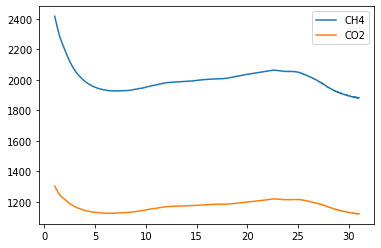

In [38]:
tspan = influent['time']
plt.plot(tspan, gas['q_ch4'].rolling(np.ceil(len(influent)/30).astype(int)).mean(), label='CH4')
plt.plot(tspan, gas['q_co2'].rolling(np.ceil(len(influent)/30).astype(int)).mean(),label='CO2')
plt.legend()


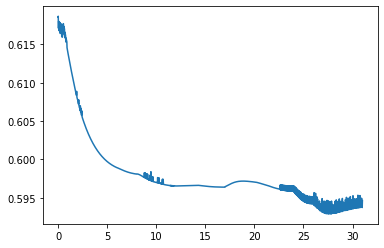

In [5]:
x_ch4 = gas['q_ch4']/gas['q_gas']
plt.plot(tspan, x_ch4, label='x_CH4')

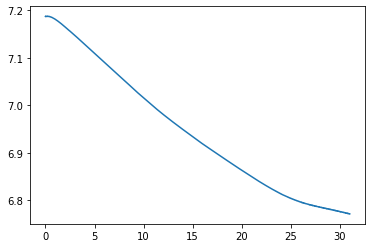

In [6]:
plt.plot(tspan,effluent['pH'], label='pH')

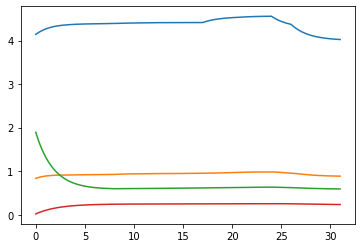

In [7]:
plt.plot(tspan, effluent['X_xc'], label = 'Xc') # Composites
plt.plot(tspan, effluent['X_ch'], label = 'Ch') # Carbohyrates
plt.plot(tspan, effluent['X_pr'], label = 'Pr') # Proteins
plt.plot(tspan, effluent['X_li'], label = 'Li') # Lipids

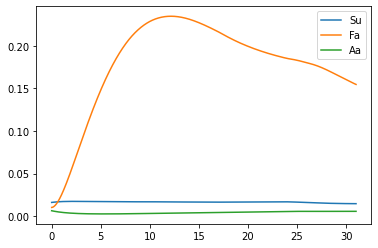

In [8]:
plt.plot(tspan, effluent['S_su'], label = 'Su') # Sugars
plt.plot(tspan, effluent['S_fa'], label = 'Fa') # Fatty acids
plt.plot(tspan, effluent['S_aa'], label = 'Aa') # Amino acids
plt.legend()

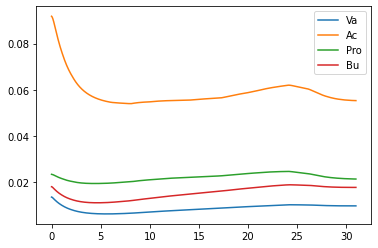

In [9]:
plt.plot(tspan, effluent['S_va'], label = 'Va') # Volatile acids
plt.plot(tspan, effluent['S_ac'], label = 'Ac') # Acetic acid
plt.plot(tspan, effluent['S_pro'], label = 'Pro') # Propionic acid
plt.plot(tspan, effluent['S_bu'], label = 'Bu') # Butyric acid
plt.legend()

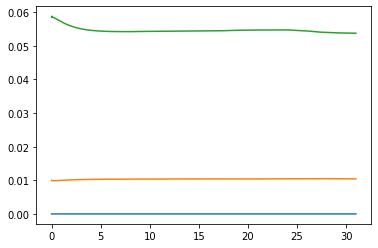

In [10]:
plt.plot(tspan, effluent['S_h2'], label = 'H2') # Hydrogen
plt.plot(tspan, effluent['S_co2'], label = 'CO2') # Carbon dioxide
plt.plot(tspan, effluent['S_ch4'], label = 'CH4') # Methane


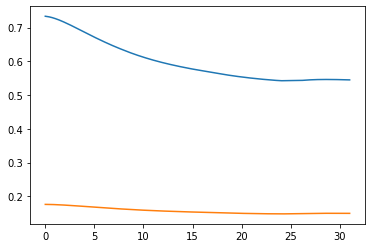

In [11]:

plt.plot(tspan, effluent['X_ac'])
plt.plot(tspan, effluent['X_pro'])


In [12]:
# related to pH inhibition taken from BSM2 report, they are global variables to avoid repeating them in DAE part
K_pH_aa =  (10 ** (-1 * (pH_LL_aa + pH_UL_aa) / 2.0))
nn_aa =  (3.0 / (pH_UL_aa - pH_LL_aa)) #we need a differece between N_aa and n_aa to avoid typos and nn_aa refers to the n_aa in BSM2 report
K_pH_ac = (10 ** (-1 * (pH_LL_ac + pH_UL_ac) / 2.0))
n_ac =  (3.0 / (pH_UL_ac - pH_LL_ac))
K_pH_h2 =  (10 ** (-1 * (pH_LL_h2 + pH_UL_h2) / 2.0))
n_h2 =  (3.0 / (pH_UL_h2 - pH_LL_h2))



(5.5, 7.5)

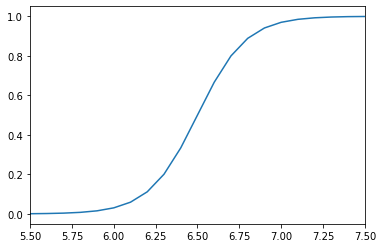

In [13]:
pH_prova = np.arange(0, 14, 0.1)
S_H_ion_p = 10 ** (-1 * pH_prova)
I_pH_prova =  ((K_pH_ac ** n_ac) / (S_H_ion_p ** n_ac + K_pH_ac ** n_ac))
plt.plot(pH_prova, I_pH_prova, label = 'Ac')
plt.xlim([5.5,7.5])

[]

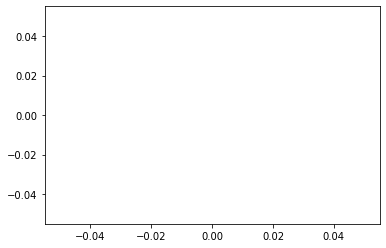

In [14]:
plt.plot()

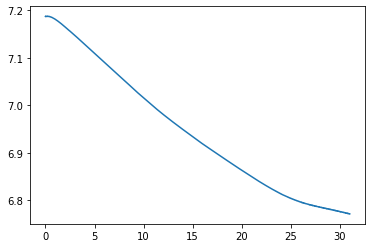

In [15]:
plt.plot(tspan,effluent['pH'])


In [16]:
I_IN_lim = 1 / (1 + (K_S_IN / effluent['S_IN']))

In [17]:
S_H_ion = 10 ** (-1 * effluent['pH'])
I_pH_ac =  ((K_pH_ac ** n_ac) / (S_H_ion ** n_ac + K_pH_ac ** n_ac))

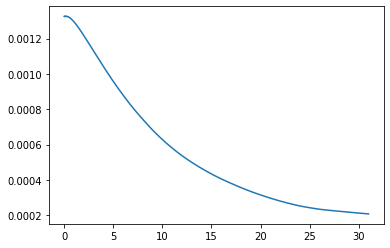

In [18]:
plt.plot(tspan,effluent['S_nh3'])

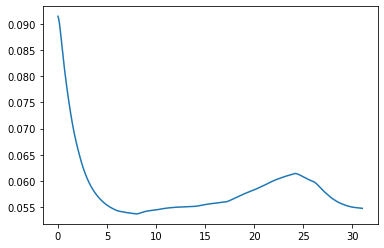

In [19]:
plt.plot(tspan,effluent['S_ac_ion'])


In [20]:
S_va_ion = K_a_va * S_va / (K_a_va + S_H_ion)
    S_bu_ion = K_a_bu * S_bu / (K_a_bu + S_H_ion)
    S_pro_ion = K_a_pro * S_pro / (K_a_pro + S_H_ion)
    S_ac_ion = K_a_ac * S_ac / (K_a_ac + S_H_ion)
    S_hco3_ion = K_a_co2 * S_IC / (K_a_co2 + S_H_ion)
    S_nh3 = K_a_IN * S_IN / (K_a_IN + S_H_ion)

IndentationError: unexpected indent (2915874516.py, line 2)

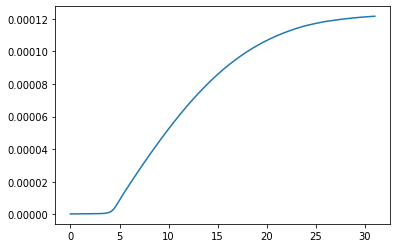

In [ ]:
plt.plot(tspan, S_H_ion)

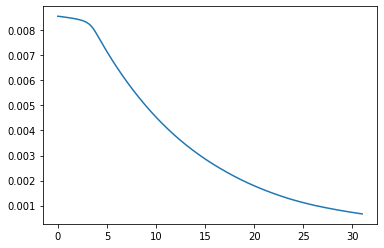

In [ ]:
plt.plot(tspan, k_dec_X_ac*effluent['X_ac'], label = 'X_ac')

In [ ]:
Rgas_m3_atm_K = 0.08205746e-3 # m^3*atm/(mol*K)
T_op = 35 + 273.15 # K
P_op = 1 # atm
V_liq = 4090 #m3


In [ ]:
tspan = influent['time']
dfresults = pd.DataFrame()
for i in range(len(tspan)-1):
    index = i
    t = tspan[index]
    XT = effluent['X_xc'][index]+ effluent['X_ch'][index] + effluent['X_pr'][index] + effluent['X_li'][index]
    S1 = effluent['S_su'][index] + effluent['S_aa'][index] + effluent['S_fa'][index] 
    S2 = (effluent['S_va'][index]/208 + effluent['S_bu'][index]/160 + effluent['S_pro'][index]/112 + effluent['S_ac'][index]/64)*1000
    X1 = (effluent['X_su'][index] + effluent['X_aa'][index] + effluent['X_fa'][index])/1.55
    X2 = (effluent['X_ac'][index] + effluent['X_h2'][index] + effluent['X_c4'][index] + effluent['X_pro'][index])/1.55
    C = effluent['S_IC'][index]*1000
    Z = S2 + effluent['S_hco3_ion'][index]*1000
    CO2 = effluent['S_co2'][index]*1000
    B = effluent['S_hco3_ion'][index]*1000
    pH = effluent['pH'][index]
    
    q_C = gas['q_co2'][index]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    q_M = gas['q_ch4'][index]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    p_C = gas['p_gas_co2'][index]*1.01325  
    results_iter = {'t': t, 'X_T': [XT], 'S_1': [S1], 'S_2': [S2], 'X_1': [X1], 'X_2': [X2], 'C': [C], 'Z': [Z], 'CO2': [CO2], 'B': [B], 'pH': [pH], 'p_C': [p_C], 'q_C': [q_C], 'q_CH4': [q_M]}
    dfresults = dfresults.append(pd.DataFrame(results_iter), ignore_index=True)

dfresults

,t,X_T,S_1,S_2,X_1,X_2,C,Z,CO2,B,pH,p_C,q_C,q_CH4
0,0.000000,5.629211,0.032416,1.954000,0.862705,0.601479,27.382557,19.256655,10.000000,17.302655,6.541187,0.000000,0.000000,0.000000
1,0.020833,5.629326,0.032430,1.957510,0.862704,0.601443,27.374047,19.236753,10.094803,17.279243,6.539957,0.373810,8.743748,15.182926
2,0.041667,5.629441,0.032443,1.961546,0.862704,0.601405,27.363721,19.216892,10.108375,17.255346,6.538773,0.374358,8.771936,15.199044
3,0.062500,5.629554,0.032457,1.966035,0.862704,0.601367,27.352902,19.197078,10.121860,17.231043,6.537582,0.374837,8.779375,15.180650
4,0.083333,5.629666,0.032471,1.970947,0.862704,0.601328,27.341492,19.177309,10.135130,17.206362,6.536390,0.375322,8.787048,15.162432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,30.895833,5.172940,6.704717,78.347910,0.514706,0.052653,-5.295238,78.326482,-5.273810,-0.021428,3.915384,-0.196741,0.000000,0.000206
1484,30.916666,5.172556,6.710749,78.329338,0.514421,0.052560,-5.303913,78.307876,-5.282451,-0.021462,3.915358,-0.197009,0.000000,0.000207
1485,30.937500,5.172177,6.716776,78.310741,0.514136,0.052467,-5.312037,78.289248,-5.290544,-0.021493,3.915332,-0.197443,0.000000,0.000203
1486,30.958333,5.171801,6.722798,78.292121,0.513851,0.052374,-5.321056,78.270592,-5.299527,-0.021528,3.915307,-0.197611,0.000000,0.000206


(0.0, 32.0)

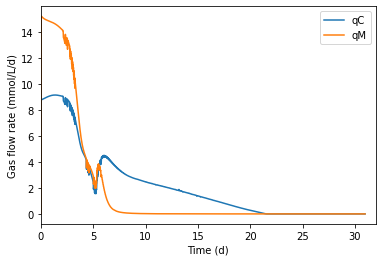

In [ ]:
plt.plot(dfresults['t'], dfresults['q_C'], label='qC')
plt.plot(dfresults['t'], dfresults['q_CH4'], label='qM')
plt.legend()
plt.ylabel('Gas flow rate (mmol/L/d)')
plt.xlabel('Time (d)')
plt.xlim([0, 32])

if t_consegna < 32:
    print('The time of delivery is', t_consegna, 'days')

In [ ]:
dfresults.to_csv(name + '_results_for_comparison.csv', index=False)